# Base de dados

Disponível em <https://www.kaggle.com/datasets/shariful07/student-flexibility-in-online-learning>

# 1. Importação das bibliotecas

In [ ]:
# Visualização e manipulação dos dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Teste de hipótese
from scipy.stats import mannwhitneyu, shapiro

# Aprendizado de máquina
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Auto-ML
#!pip install markupsafe==2.0.1
#!pip install pycaret
import jinja2
from pycaret.classification import *

# Extras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 2. Carregamento e informações da base de dados

In [ ]:
df = pd.read_csv('dados.csv')

## 2.1 Há dados faltantes?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


<span style="color:green"> Não! </span>

In [ ]:
# Shape do dataset
print(f'{df.shape[0]} linhas e {df.shape[1]} colunas')

1205 linhas e 11 colunas


In [ ]:
df.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low


# 3. Análise Exploratória

## 3.1 Em relação a variável alvo, os dados estão balanceados?

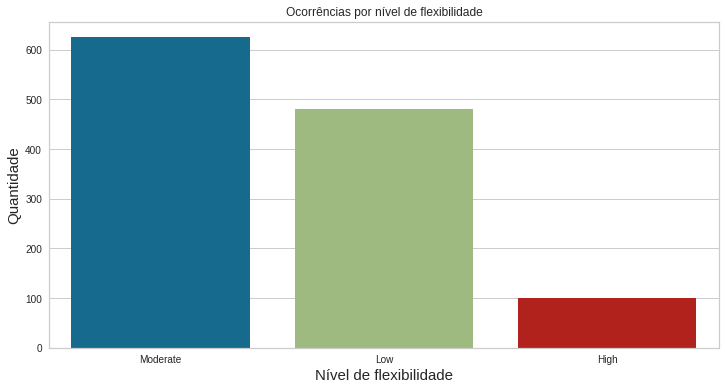

In [ ]:
# Variável alvo
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(x='Flexibility Level', data=df)
f.set_title('Ocorrências por nível de flexibilidade')
f.set_xlabel('Nível de flexibilidade',fontsize=15,)
f.set_ylabel('Quantidade',fontsize=15)
plt.show()

<span style="color:red"><strong>Não, os dados estão desbalanceados!!</strong></span>

## 3.2 Qual a distribução de níveis de educação dos estudantes?

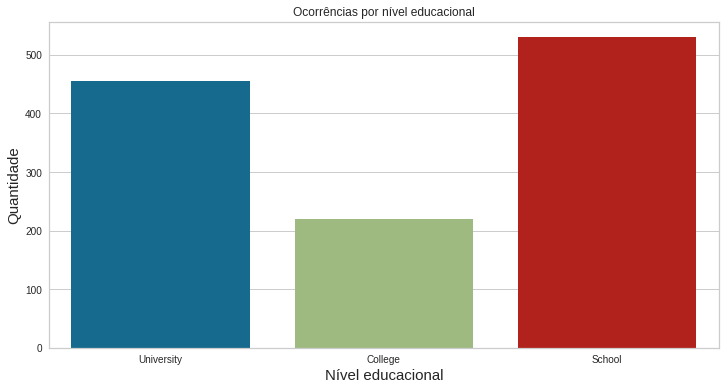

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(x='Education Level', data=df)
f.set_title('Ocorrências por nível educacional')
f.set_xlabel('Nível educacional',fontsize=15,)
f.set_ylabel('Quantidade',fontsize=15)
plt.show()

* Cerca de 43.9% na School
* Cerca de 37.8% na University
* Cerca de 18.1% no College

## 3.3 Qual o tipo de instituição de ensino mais predomindante no dataset?

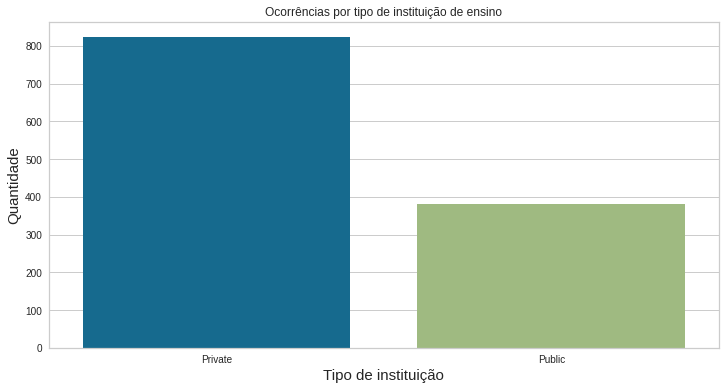

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(x='Institution Type', data=df)
f.set_title('Ocorrências por tipo de instituição de ensino')
f.set_xlabel('Tipo de instituição',fontsize=15,)
f.set_ylabel('Quantidade',fontsize=15)
plt.show()

<strong> Instituição privada! </strong>

## 3.4 Qual classe financeira é predominante no dataset?

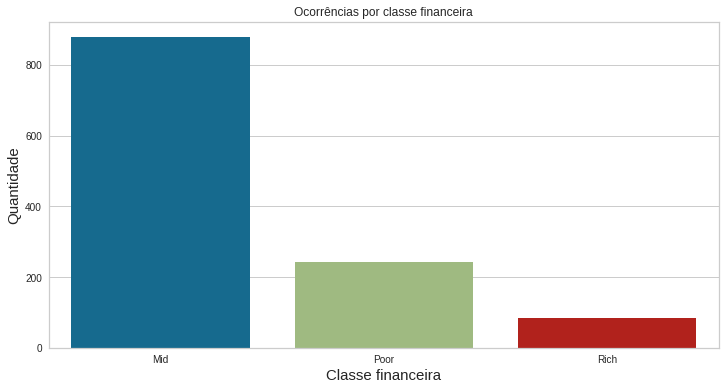

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(x='Financial Condition', data=df)
f.set_title('Ocorrências por classe financeira')
f.set_xlabel('Classe financeira',fontsize=15,)
f.set_ylabel('Quantidade',fontsize=15)
plt.show()

<strong> Classe média! </strong>

### 3.4.1 Percentualmente, qual classe financeira possui mais representantes no nível de flexibilidade alto e baixo?

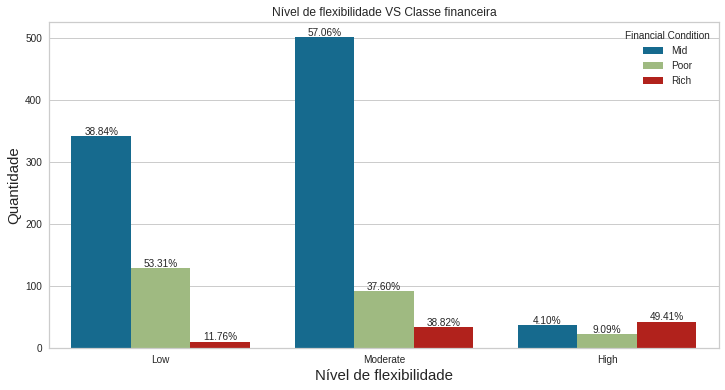

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(x='Flexibility Level', data=df, hue='Financial Condition', order=['Low','Moderate','High'])
f.set_title('Nível de flexibilidade VS Classe financeira')
f.set_xlabel('Nível de flexibilidade',fontsize=15)
f.set_ylabel('Quantidade',fontsize=15)
for i in range(len(f.patches)):
  if(i <= 2):
    total = len(df[df['Financial Condition'] == 'Mid'])
    height = f.patches[i].get_height()
    f.text(f.patches[i].get_x()+f.patches[i].get_width()/2.,
    height + 3,
    "{:1.2f}%".format((height/total)*100),
    ha="center")
  elif (i > 2 and i <= 5):
    total = len(df[df['Financial Condition'] == 'Poor'])
    height = f.patches[i].get_height()
    f.text(f.patches[i].get_x()+f.patches[i].get_width()/2.,
    height + 3,
    "{:1.2f}%".format((height/total)*100),
    ha="center")
  else:
    total = len(df[df['Financial Condition'] == 'Rich'])
    height = f.patches[i].get_height()
    f.text(f.patches[i].get_x()+f.patches[i].get_width()/2.,
    height + 3,
    "{:1.2f}%".format((height/total)*100),
    ha="center")

* Baixo nível de flexibilidade: mais de 50% da classe mais pobre possui baixo nível de flexibilidade
* Alto nível de flexibilidade: quase 50% da classe mais rica possui alto nível de flexibilidade

## 3.5 Qual é a distribuição de gênero?

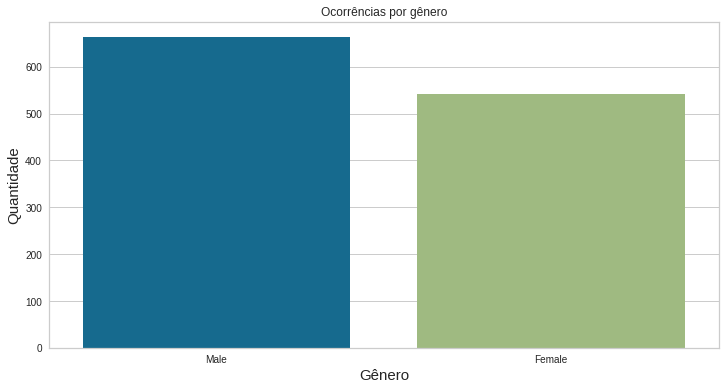

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(df['Gender'])
f.set_title('Ocorrências por gênero')
f.set_xlabel('Gênero',fontsize=15)
f.set_ylabel('Quantidade',fontsize=15)
plt.show()

<strong> Cerca de 55.02 % de homens e 44.98% de mulheres </strong>

## 3.6 Qual o tipo de dispositivo mais utilizado pelos estudantes?

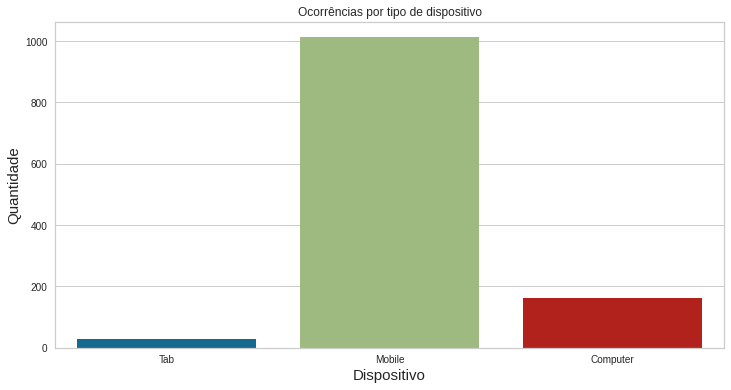

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(df['Device'])
f.set_title('Ocorrências por tipo de dispositivo')
f.set_xlabel('Dispositivo',fontsize=15)
f.set_ylabel('Quantidade',fontsize=15)
plt.show()

<strong> Cerca de 84% dos estudantes utilizam dispositivos mobile! </strong>

## 3.7 Em qual localidade os estudantes estão mais concentrados?

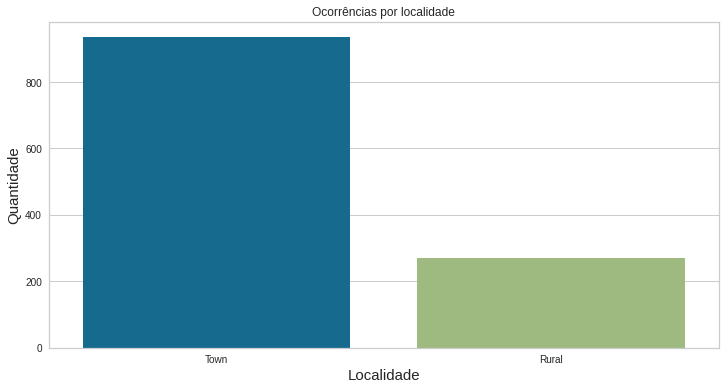

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(df['Location'])
f.set_title('Ocorrências por localidade')
f.set_xlabel('Localidade',fontsize=15)
f.set_ylabel('Quantidade',fontsize=15)
plt.show()

<strong> A maioria dos estudantes estuda na zona urbana! </strong>

### 3.7.1 Percentualmente, qual localidade possui mais representantes no nível de flexibilidade alto e baixo?

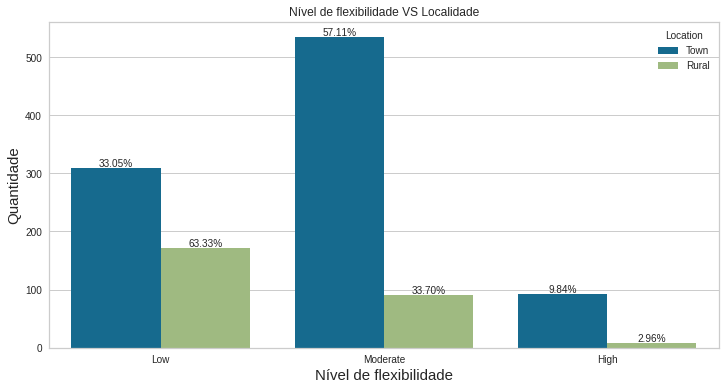

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(x='Flexibility Level', data=df, hue='Location', order=['Low','Moderate','High'])
f.set_title('Nível de flexibilidade VS Localidade')
f.set_xlabel('Nível de flexibilidade',fontsize=15)
f.set_ylabel('Quantidade',fontsize=15)
for i in range(len(f.patches)):
  if(i <= 2):
    total = len(df[df['Location'] == 'Town'])
    height = f.patches[i].get_height()
    f.text(f.patches[i].get_x()+f.patches[i].get_width()/2.,
    height + 3,
    "{:1.2f}%".format((height/total)*100),
    ha="center")
  elif (i > 2 and i <= 5):
    total = len(df[df['Location'] == 'Rural'])
    height = f.patches[i].get_height()
    f.text(f.patches[i].get_x()+f.patches[i].get_width()/2.,
    height + 3,
    "{:1.2f}%".format((height/total)*100),
    ha="center")

* Baixo nível de flexibilidade: cerca de 63% dos estudantes que estudam na zona rural possuem um baixo nível de flexibilidade;
* Alto nível de flexibilidade: cerca de 10% dos estudantes que estudam na zona urbana possuem alto nível de flexibilidade

<strong> Resumo:</strong> apesar de não ser determinante para caracterizar o nível de flexibilidade alto, vide que apenas 10% dos estudantes que moram na cidade estão nesta classe, não morar na zona urbana é determinante para caracterizar o nível de flexibilidade baixo, visto que mais da metade dos estudantes da zona rual estão nesta classe.

## 3.8 Qual tipo de internet os estudantes mais usam?

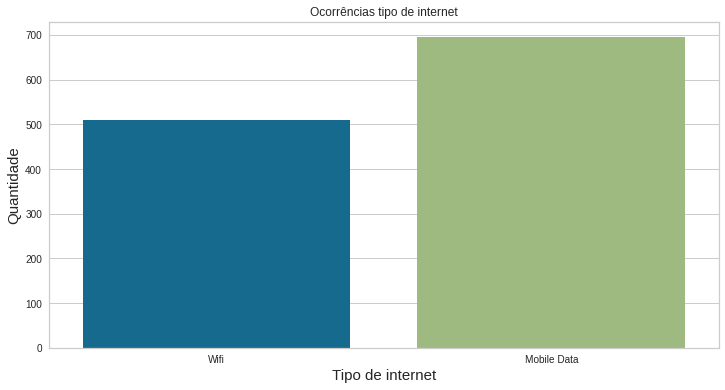

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(df['Internet Type'])
f.set_title('Ocorrências tipo de internet')
f.set_xlabel('Tipo de internet',fontsize=15)
f.set_ylabel('Quantidade',fontsize=15)
plt.show()

<strong> A maioria dos estudantes utilizam dados móveis! </strong>

## 3.9 Qual o tipo de rede predominante?

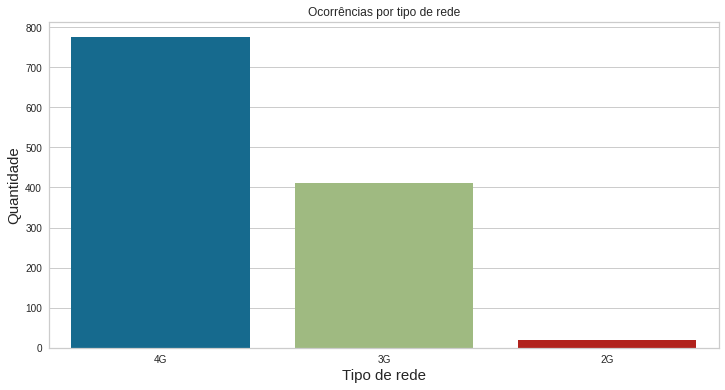

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(df['Network Type'])
f.set_title('Ocorrências por tipo de rede')
f.set_xlabel('Tipo de rede',fontsize=15)
f.set_ylabel('Quantidade',fontsize=15)
plt.show()

<strong> A maioria dos estudantes utilizam rede 4G! </strong>

### 3.9.2 O tipo de rede influencia o nível de flexibilidade?

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


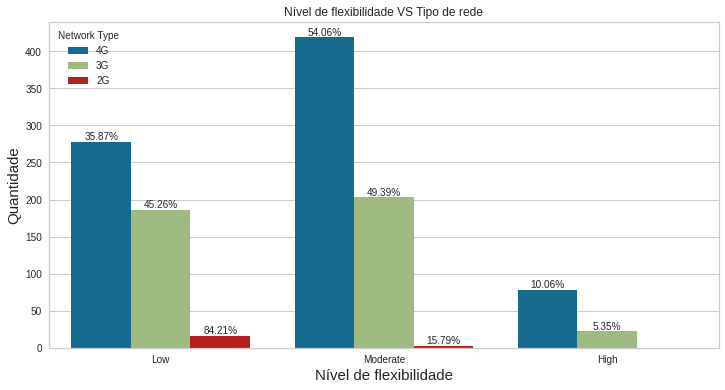

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
f = sns.countplot(x='Flexibility Level', data=df, hue='Network Type', order=['Low','Moderate','High'])
f.set_title('Nível de flexibilidade VS Tipo de rede')
f.set_xlabel('Nível de flexibilidade',fontsize=15)
f.set_ylabel('Quantidade',fontsize=15)
for i in range(len(f.patches)):
  if(i <= 2):
    total = len(df[df['Network Type'] == '4G'])
    height = f.patches[i].get_height()
    f.text(f.patches[i].get_x()+f.patches[i].get_width()/2.,
    height + 3,
    "{:1.2f}%".format((height/total)*100),
    ha="center")
  elif (i > 2 and i <= 5):
    total = len(df[df['Network Type'] == '3G'])
    height = f.patches[i].get_height()
    f.text(f.patches[i].get_x()+f.patches[i].get_width()/2.,
    height + 3,
    "{:1.2f}%".format((height/total)*100),
    ha="center")
  else:
    total = len(df[df['Network Type'] == '2G'])
    height = f.patches[i].get_height()
    f.text(f.patches[i].get_x()+f.patches[i].get_width()/2.,
    height + 3,
    "{:1.2f}%".format((height/total)*100),
    ha="center")

* Sim, visto que, apesar de haverem poucos dados de estudantes com tipo de rede 2G, é possível inferir uma certa correlação do tipo de rede com o nível de flexibilidade, dado que quase 85% dos estudantes que usam 2G possuem baixo nível de flexibilidade;
* Além disso, quase metade dos estudantes que usam 3G possuem baixo nível de flexibilidade.

## 3.10 Explorando a idade dos estudantes (única variável quantitativa)

In [ ]:
df.describe()

,Age
count,1205.000000
mean,17.065560
std,5.830369
min,9.000000
25%,11.000000
50%,18.000000
75%,23.000000
max,27.000000


### 3.10.1 Qual nível de flexibilidade possui a maior mediana?

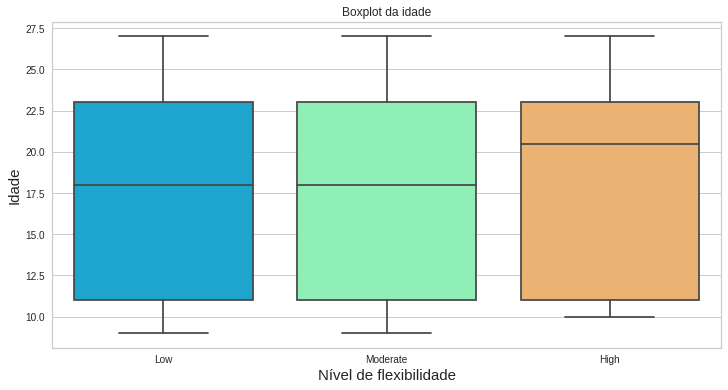

In [ ]:
f = sns.boxplot(x='Flexibility Level',y='Age',data=df,palette='rainbow', order=['Low','Moderate','High'])
f.set_title('Boxplot da idade')
f.set_xlabel('Nível de flexibilidade',fontsize=15)
f.set_ylabel('Idade',fontsize=15)
plt.show()

<strong> Resumo: </strong> Estudantes com maior nível de flexibilidade possuem uma mediana de idade maior que os demais

# 4.Teste de hipótese 

In [ ]:
# Definindo o nível de significância (5%)
alpha = 0.05

### 4.1 Teste de Shapiro (Normalidade dos dados)

Disponível em <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html>

* H0: Os dados seguem uma distribuição gaussiana
* H1: Os dados não seguem uma distribuição gaussiana

In [ ]:
# Hipóteses
h_0 = 'Os dados seguem uma distribuição gaussiana'
h_1 = 'Os dados não seguem uma distribuição gaussiana'

In [ ]:
# Teste para uma amostra de tamanho 100 com reposição
data = df['Age'].sample(100, replace=True)
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print(h_0)
else:
	print(h_1)

stat=0.824, p=0.000
Os dados não seguem uma distribuição gaussiana


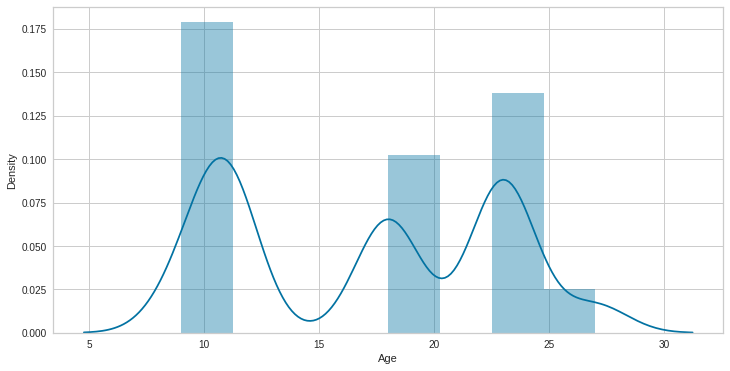

In [ ]:
sns.distplot(df['Age'])

<strong> Não é possível utilizar testes de hipótese paramétricos para esta população diretamente, visto os dados não seguirem uma distribuição normal. </strong>

### 4.2 Teste não-paramétrico - Teste U de Mann-Whitney

Disponível em <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html>

In [ ]:
# Amostragem aleatória
x = df['Age'].sample(100, random_state=1, replace=True).to_list()
y = df['Age'].sample(100, random_state=2, replace=True).to_list()

Vamos utilizar o teste U de Mann-Whitney para verificar se os dados são oriundos de populações com a mesma distribuição, tomando como base as seguintes hipóteses:

* H0: Amostras retiradas de populações com a mesma distribuição
* H1: Amostras retiradas de populações com a distribuições diferentes

In [ ]:
# Hipóteses
h_0 = 'Amostras retiradas de populações com a mesma distribuição'
h_1 = 'Amostras retiradas de populações com distribuições diferentes'

In [ ]:
stat, p = mannwhitneyu(x,y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print(h_0)
else:
    print(h_1)

stat=4979.000, p=0.479
Amostras retiradas de populações com a mesma distribuição


# 5.Criação de um modelo de classificação do nível de flexibilidade

In [ ]:
df.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low


## 5.1 Conversão dos atributos categóricos

In [ ]:
df.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low


In [ ]:
def to_category(column, values):
  onehotencoder = OneHotEncoder(categories=[values])
  x = onehotencoder.fit_transform(df[[column]]).toarray()
  new_df = pd.DataFrame(x, columns=df[column].unique())
  return new_df

In [ ]:
category_education_level = to_category('Education Level', df['Education Level'].unique())
df = pd.concat([category_education_level,df], axis=1)
del df['Education Level']

In [ ]:
category_institution_type = to_category('Institution Type', df['Institution Type'].unique())
df = pd.concat([category_institution_type,df], axis=1)
del df['Institution Type']

In [ ]:
category_gender = to_category('Gender', df['Gender'].unique())
df = pd.concat([category_gender,df], axis=1)
del df['Gender']

In [ ]:
category_device = to_category('Device', df['Device'].unique())
df = pd.concat([category_device,df], axis=1)
del df['Device']

In [ ]:
category_it_student = to_category('IT Student', df['IT Student'].unique())
df = pd.concat([category_it_student,df], axis=1)
del df['IT Student']

In [ ]:
category_location = to_category('Location', df['Location'].unique())
df = pd.concat([category_location,df], axis=1)
del df['Location']

In [ ]:
category_financial_condition = to_category('Financial Condition', df['Financial Condition'].unique())
df = pd.concat([category_financial_condition,df], axis=1)
del df['Financial Condition']

In [ ]:
category_internet_type = to_category('Internet Type', df['Internet Type'].unique())
df = pd.concat([category_internet_type,df], axis=1)
del df['Internet Type']

In [ ]:
category_network_type = to_category('Network Type', df['Network Type'].unique())
df = pd.concat([category_network_type,df], axis=1)
del df['Network Type']

In [ ]:
df.head()

,4G,3G,2G,Wifi,Mobile Data,Mid,Poor,Rich,Town,Rural,...,Computer,Male,Female,Private,Public,University,College,School,Age,Flexibility Level
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,23,Moderate
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,23,Moderate
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,18,Moderate
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,11,Moderate
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,18,Low


In [ ]:
df['Flexibility Level'] = df['Flexibility Level'].astype('category').cat.codes

In [ ]:
df['Flexibility Level'].value_counts()

2    625
1    480
0    100
Name: Flexibility Level, dtype: int64

In [ ]:
df['Flexibility Level'].replace({0:3},inplace=True)

In [ ]:
df['Flexibility Level'].value_counts()

2    625
1    480
3    100
Name: Flexibility Level, dtype: int64

## 5.2 Modelo

### 5.2.1 Normalização dos atributos e separação entre conjunto de treino e teste

In [ ]:
target_name = 'Flexibility Level'
X = df.drop(target_name, axis=1)
y = df[target_name]

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.77777778],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.77777778],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.5       ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.11111111],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.5       ],
       [0.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.11111111]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

### 5.2.2 Regressão Logística

In [ ]:
logis = LogisticRegression()

In [ ]:
logis.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = logis.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.58      0.58      0.58        96
           2       0.63      0.66      0.65       125
           3       0.54      0.35      0.42        20

    accuracy                           0.61       241
   macro avg       0.58      0.53      0.55       241
weighted avg       0.60      0.61      0.60       241



### 5.2.3 Árvore de decisão

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree = dtree.fit(X_train,y_train)

In [ ]:
y_predict = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.74      0.81      0.78        96
           2       0.83      0.78      0.80       125
           3       0.63      0.60      0.62        20

    accuracy                           0.78       241
   macro avg       0.73      0.73      0.73       241
weighted avg       0.78      0.78      0.78       241



### 5.4 Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf = rf.fit(X_train,y_train)

In [ ]:
y_predict = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.74      0.81      0.78        96
           2       0.83      0.78      0.80       125
           3       0.63      0.60      0.62        20

    accuracy                           0.78       241
   macro avg       0.73      0.73      0.73       241
weighted avg       0.78      0.78      0.78       241



* Os modelos que melhor perfomaram foram Árvore de Decisão e Floresta Aleatória, ambos com 78% de acurácia.